In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/8° Semestre/IA M2 Benji"
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/8° Semestre/IA M2 Benji
 augmented  'Copia de Model Tunning.ipynb'   Dataset2_1   images


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.15.0


In [11]:
base_dir = 'Dataset2_1'
train_dir = os.path.join(base_dir,'Train')
test_dir = os.path.join(base_dir, 'Test')

class_names = sorted(os.listdir(train_dir))
class_labels = {
    'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9,
    'K': 10, 'L': 11, 'M': 12, 'N': 13, 'Nothing': 14, 'O': 15, 'P': 16, 'Q': 17,
    'R': 18, 'S': 19, 'Space': 20, 'T': 21, 'U': 22, 'V': 23, 'W': 24, 'X': 25,
    'Y': 26, 'Z': 27
}

In [4]:
class_labels

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'Nothing': 14,
 'O': 15,
 'P': 16,
 'Q': 17,
 'R': 18,
 'S': 19,
 'Space': 20,
 'T': 21,
 'U': 22,
 'V': 23,
 'W': 24,
 'X': 25,
 'Y': 26,
 'Z': 27}

In [13]:
def rename_images_with_labels(dataset_dir):
    class_names = os.listdir(dataset_dir)

    for class_name in class_names:
        class_dir = os.path.join(dataset_dir, class_name)
        if os.path.isdir(class_dir):
            files = os.listdir(class_dir)
            files.sort()
            for i, file_name in enumerate(files, start=1):
                file_ext = os.path.splitext(file_name)[1]
                new_file_name = f"{class_name}{i}{file_ext}"
                os.rename(os.path.join(class_dir, file_name), os.path.join(class_dir, new_file_name))
                print(f"Renamed: {file_name} to {new_file_name}")

rename_images_with_labels(train_dir)

Streaming output truncated to the last 5000 lines.
Renamed: 10.jpg to U1.jpg
Renamed: 100.jpg to U2.jpg
Renamed: 1000.jpg to U3.jpg
Renamed: 1001.jpg to U4.jpg
Renamed: 1002.jpg to U5.jpg
Renamed: 1003.jpg to U6.jpg
Renamed: 1004.jpg to U7.jpg
Renamed: 1005.jpg to U8.jpg
Renamed: 1006.jpg to U9.jpg
Renamed: 1007.jpg to U10.jpg
Renamed: 1008.jpg to U11.jpg
Renamed: 1009.jpg to U12.jpg
Renamed: 101.jpg to U13.jpg
Renamed: 1010.jpg to U14.jpg
Renamed: 1011.jpg to U15.jpg
Renamed: 1012.jpg to U16.jpg
Renamed: 1013.jpg to U17.jpg
Renamed: 1014.jpg to U18.jpg
Renamed: 1015.jpg to U19.jpg
Renamed: 1016.jpg to U20.jpg
Renamed: 1017.jpg to U21.jpg
Renamed: 1018.jpg to U22.jpg
Renamed: 102.jpg to U23.jpg
Renamed: 103.jpg to U24.jpg
Renamed: 109.jpg to U25.jpg
Renamed: 118.jpg to U26.jpg
Renamed: 119.jpg to U27.jpg
Renamed: 129.jpg to U28.jpg
Renamed: 138.jpg to U29.jpg
Renamed: 157.jpg to U30.jpg
Renamed: 1753.jpg to U31.jpg
Renamed: 1754.jpg to U32.jpg
Renamed: 1755.jpg to U33.jpg
Renamed: 1756

In [21]:
rename_images_with_labels(test_dir)

Streaming output truncated to the last 5000 lines.
Renamed: 1155.jpg to J151.jpg
Renamed: 1156.jpg to J152.jpg
Renamed: 1157.jpg to J153.jpg
Renamed: 1158.jpg to J154.jpg
Renamed: 1159.jpg to J155.jpg
Renamed: 1160.jpg to J156.jpg
Renamed: 1161.jpg to J157.jpg
Renamed: 1162.jpg to J158.jpg
Renamed: 1163.jpg to J159.jpg
Renamed: 1164.jpg to J160.jpg
Renamed: 1165.jpg to J161.jpg
Renamed: 1166.jpg to J162.jpg
Renamed: 1167.jpg to J163.jpg
Renamed: 1168.jpg to J164.jpg
Renamed: 1169.jpg to J165.jpg
Renamed: 1170.jpg to J166.jpg
Renamed: 1171.jpg to J167.jpg
Renamed: 1172.jpg to J168.jpg
Renamed: 1173.jpg to J169.jpg
Renamed: 1174.jpg to J170.jpg
Renamed: 1175.jpg to J171.jpg
Renamed: 1176.jpg to J172.jpg
Renamed: 1177.jpg to J173.jpg
Renamed: 1178.jpg to J174.jpg
Renamed: 1179.jpg to J175.jpg
Renamed: 1180.jpg to J176.jpg
Renamed: 1181.jpg to J177.jpg
Renamed: 1182.jpg to J178.jpg
Renamed: 1183.jpg to J179.jpg
Renamed: 1184.jpg to J180.jpg
Renamed: 1185.jpg to J181.jpg
Renamed: 1186.jpg t

In [5]:
len(class_labels)

28

In [22]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    preprocessing_function=tf.image.rgb_to_grayscale,
    validation_split=0.2
    )
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=tf.image.rgb_to_grayscale
    )
test_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=tf.image.rgb_to_grayscale
    )

Found 22400 images belonging to 28 classes.
Found 5600 images belonging to 28 classes.
Found 6900 images belonging to 28 classes.


<Figure size 640x480 with 0 Axes>

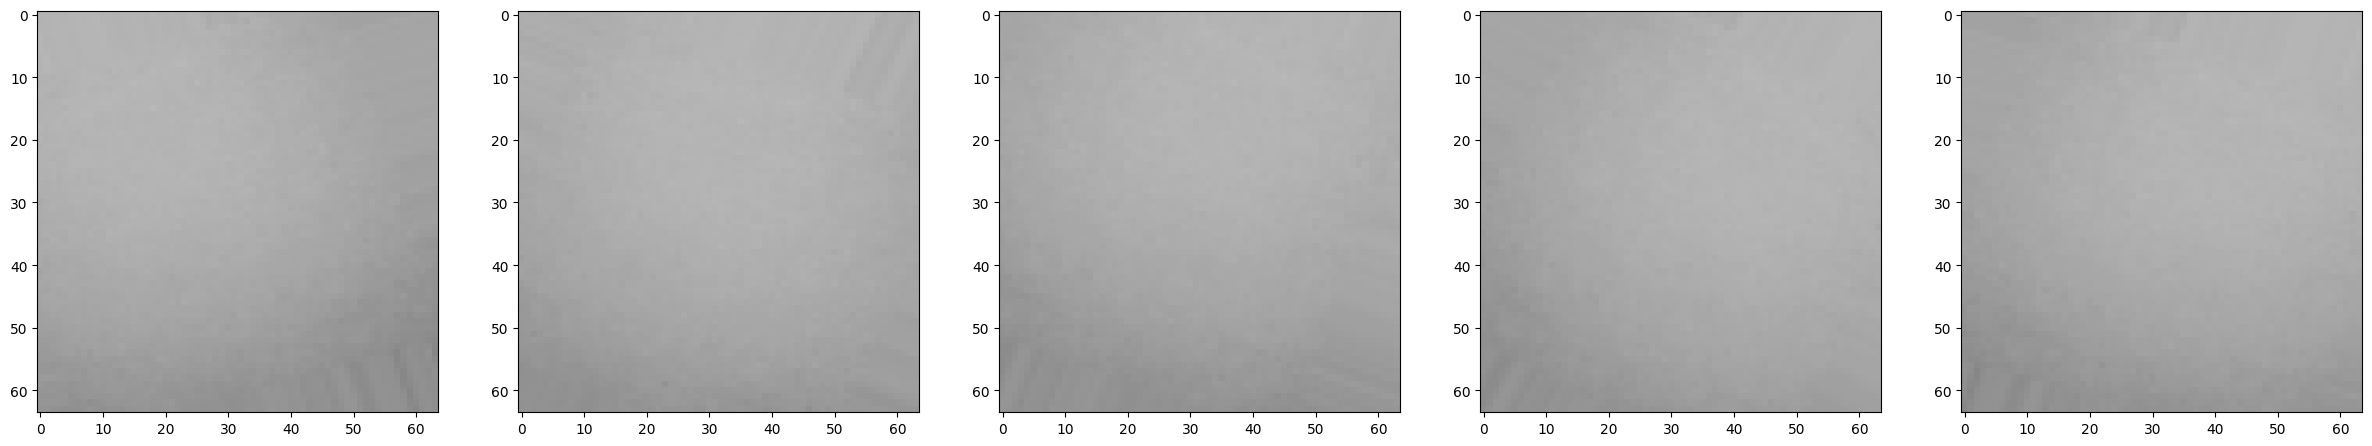

In [23]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (64, 64),
    batch_size = 32,
    class_mode='sparse',
    subset='training',
    classes=class_names,  # Pass class labels
    shuffle=True,
    seed=42
    )

validation_generator = train_datagen.flow_from_directory(
    'Dataset2_1/Train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='sparse',
    subset='validation',
    classes=class_names,  # Pass class labels
    shuffle=True,
    seed=42
    )
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='sparse',
    classes=class_names,
    shuffle=False
    )

plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 5, figsize=(30, 8))

for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0], cmap='gray')

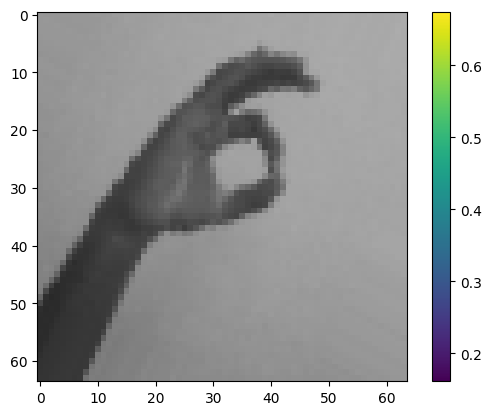

In [26]:
batch_images, batch_labels = train_generator.next()
plt.figure()
plt.imshow(batch_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

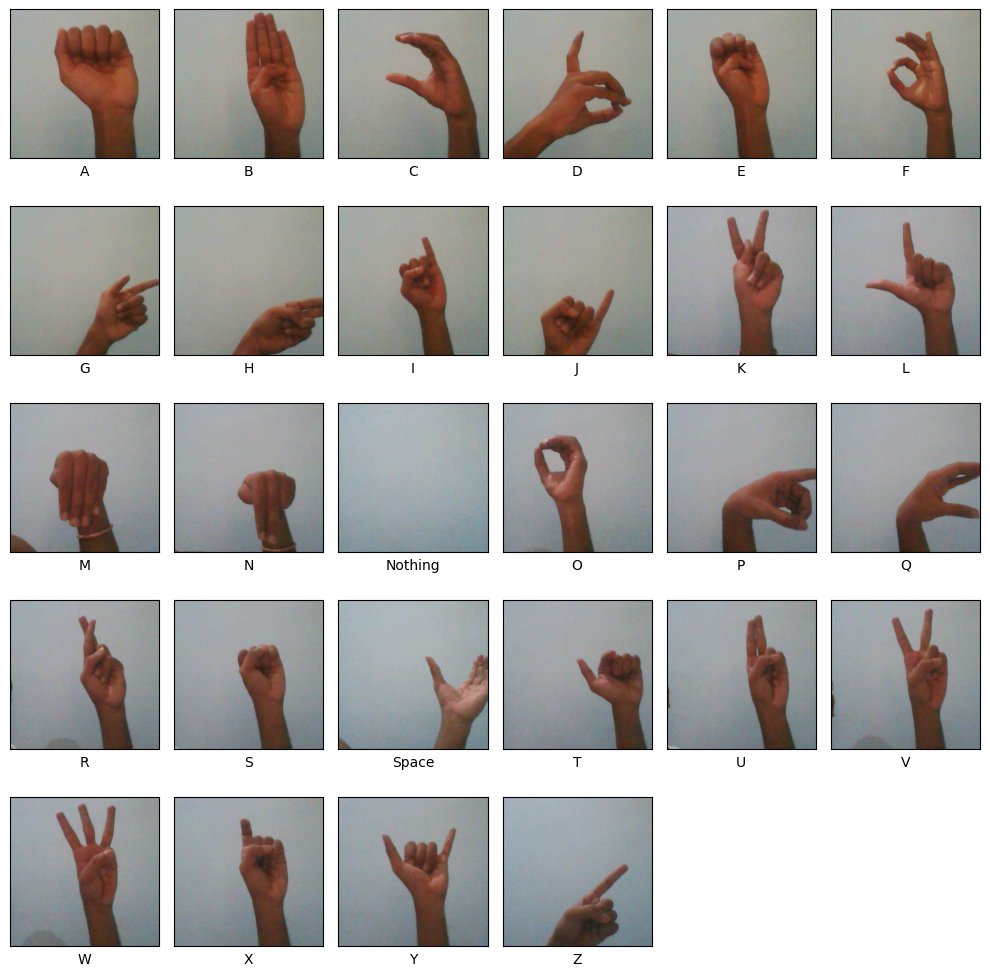

In [28]:
plt.figure(figsize=(10, 10))
images_per_class = 1  # Number of images per class to display
images_shown = 0
class_counts = {class_name: 0 for class_name in class_names}

for class_name in class_names:
    class_dir = os.path.join(train_dir, class_name)
    if os.path.isdir(class_dir):
        class_files = os.listdir(class_dir)
        if class_files:  # Check if class directory is not empty
            # Sort files to ensure consistent ordering
            class_files.sort()
            # Select the first image from the class directory
            image_path = os.path.join(class_dir, class_files[0])
            image = plt.imread(image_path)
            plt.subplot(5, 6, images_shown + 1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(image, cmap=plt.cm.binary)
            plt.xlabel(class_name)
            images_shown += 1
            if images_shown >= len(class_names) * images_per_class:
                break

plt.tight_layout()
plt.show()

In [34]:
from tensorflow.keras import optimizers, callbacks
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])

model.summary()

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 6, 6, 128)        

Epoch 1/10
700/700 [==============================] - 446s 635ms/step - loss: 0.0513 - accuracy: 0.9853 - val_loss: 0.1228 - val_accuracy: 0.9668
Epoch 2/10
700/700 [==============================] - 449s 641ms/step - loss: 0.0438 - accuracy: 0.9871 - val_loss: 0.1509 - val_accuracy: 0.9648
Epoch 3/10
700/700 [==============================] - 449s 640ms/step - loss: 0.0433 - accuracy: 0.9865 - val_loss: 0.1776 - val_accuracy: 0.9563
Epoch 4/10
700/700 [==============================] - 435s 621ms/step - loss: 0.0456 - accuracy: 0.9861 - val_loss: 0.2348 - val_accuracy: 0.9550


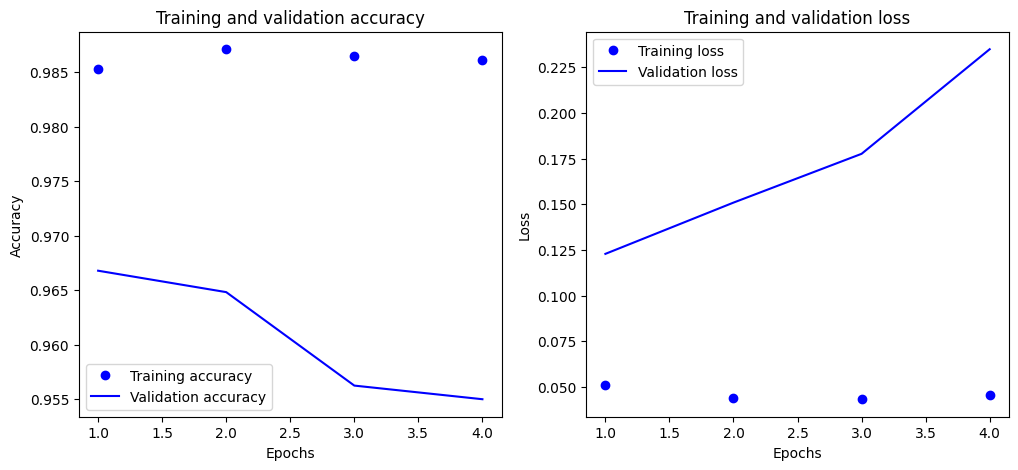

In [36]:
def early_stopping(monitor='val_loss', min_delta=0, patience=5):
    return callbacks.EarlyStopping(monitor=monitor, min_delta=min_delta, patience=patience, restore_best_weights=True)
early_stop = early_stopping(monitor='val_loss', patience=3)  # Monitor validation loss

history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [38]:
# evaluate the model using images generated for test and the labels
num_test_samples = len(test_generator.filenames)
num_test_steps = num_test_samples // test_generator.batch_size

# Evaluate the model on the test data generator
test_loss, test_acc = model.evaluate(test_generator, steps=num_test_steps)
print('\nTest accuracy:', test_acc)

215/215 [==============================] - 1559s 7s/step - loss: 0.0925 - accuracy: 0.9693

Test accuracy: 0.9693313837051392


In [39]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [40]:
predictions = probability_model.predict(test_generator)

216/216 [==============================] - 71s 327ms/step


Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [70]:
predictions[216]

array([0.08962031, 0.0336905 , 0.0336905 , 0.0336905 , 0.0336905 ,
       0.0336905 , 0.0336905 , 0.03370143, 0.0336905 , 0.0336905 ,
       0.0336905 , 0.03370057, 0.03369113, 0.0336923 , 0.0336905 ,
       0.0336905 , 0.0336905 , 0.0336905 , 0.0336905 , 0.0336905 ,
       0.0336905 , 0.03440332, 0.0336905 , 0.0336905 , 0.0336905 ,
       0.0336905 , 0.03369051, 0.0336905 ], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 28 different articles of clothing. You can see which label has the highest confidence value:

In [43]:
np.argmax(predictions[0])

0

Define functions to graph the full set of 10 class predictions.

In [48]:
def plot_image(i, predictions_array, true_label, img, class_names):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                          100*np.max(predictions_array),
                                          class_names[true_label]),
                                          color=color)

# Define plot_value_array function
def plot_value_array(i, predictions_array, true_label, class_names):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(len(class_names)))
    plt.yticks([])
    thisplot = plt.bar(range(len(class_names)), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

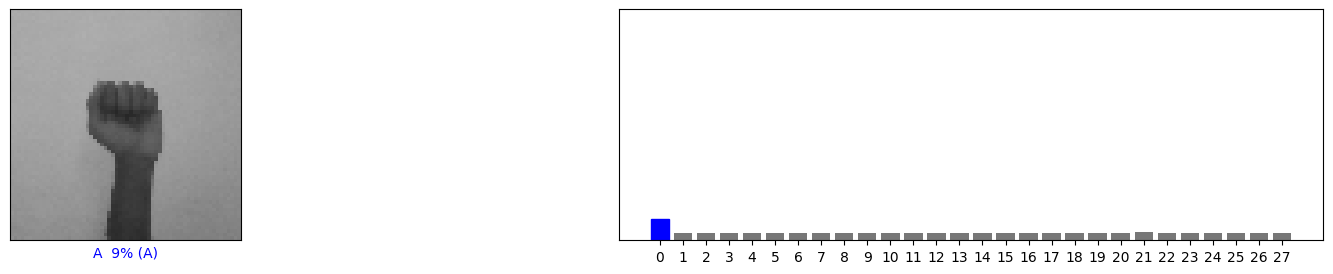

In [60]:
i = 1
plt.figure(figsize=(20, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_generator.classes, test_generator[i][0], class_names)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_generator.classes, class_names)
plt.show()

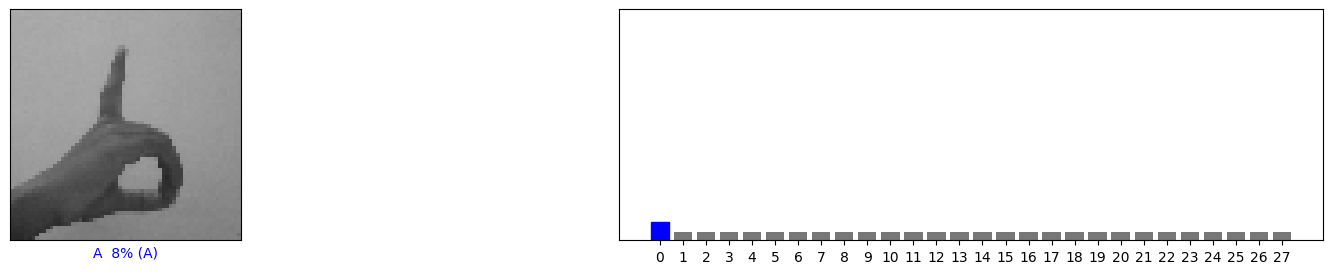

In [65]:
i = 30
plt.figure(figsize=(20, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_generator.classes, test_generator[i][0], class_names)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_generator.classes, class_names)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

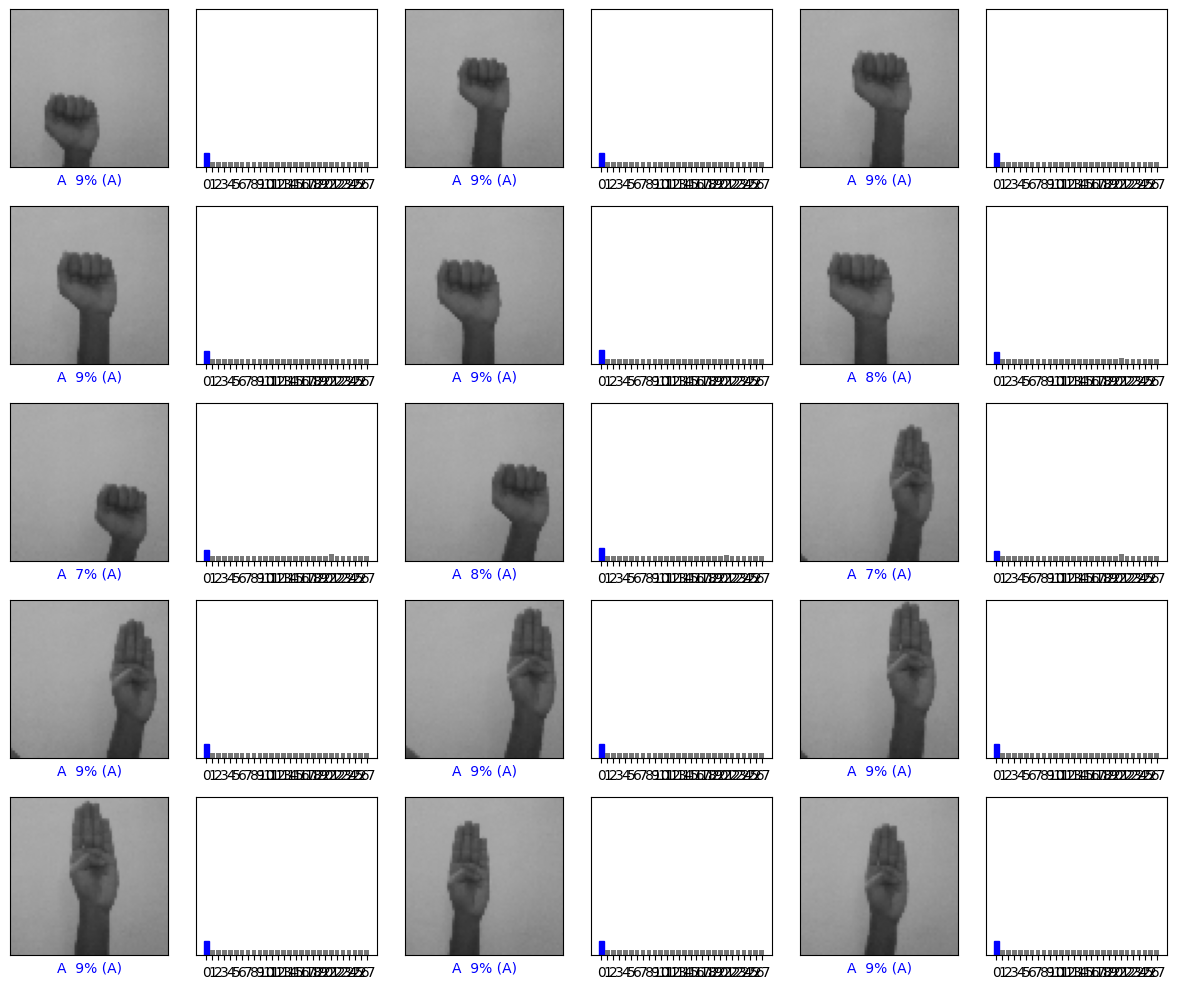

In [66]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_generator.classes, test_generator[i][0], class_names)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_generator.classes, class_names)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [ ]:
# Grab an image from the test dataset.
img = test_generator[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 23ms/step
[[1.1071331e-04 9.6448897e-14 9.9771357e-01 1.2685771e-11 1.1729526e-03
  7.4498177e-12 1.0027720e-03 8.7334300e-18 1.8890409e-09 1.6359591e-15]]


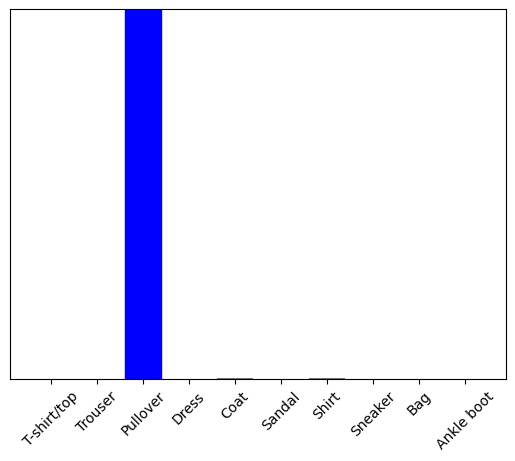

In [ ]:
plot_value_array(1, predictions_single[0], class_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [ ]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.

To learn more about building models with Keras, see the [Keras guides](https://www.tensorflow.org/guide/keras).